<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/simpleRNN_time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model

(144, 1)
(100, 1)
(44, 1)


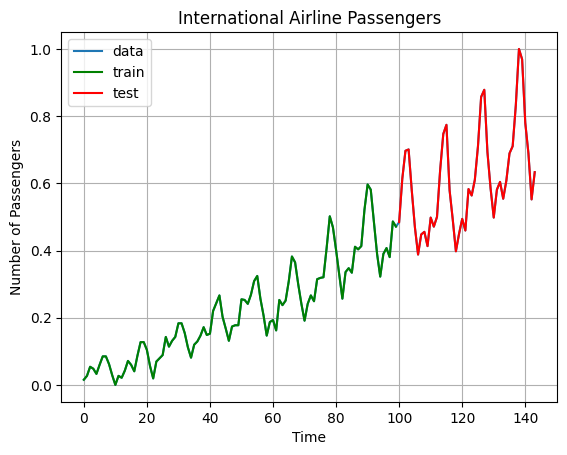

In [26]:
# Load the dataset
url='https://raw.githubusercontent.com/ibribr/DT8807/master/AirPassengers.csv'
df = pd.read_csv(url, usecols=[1], engine='python')      #'AirPassengers.csv'
dataset = df.values
dataset = dataset.astype('float32')

print(dataset.shape)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into training and testing sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(train.shape)
print(test.shape)

#plot the data
test_plot = np.empty_like(dataset)
test_plot[:] = np.nan
test_plot[len(train):len(dataset),:]=test

plt.plot(dataset)
plt.plot(train, 'g-')
plt.plot(test_plot, 'r-')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend(['data','train','test'])
plt.grid()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


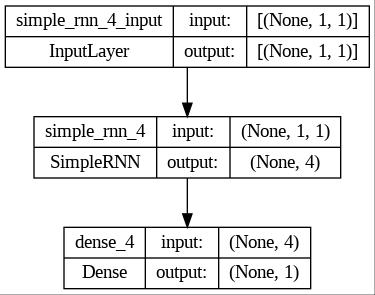

In [39]:
# Convert the dataset into inputs and outputs
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# Reshape the input data to match the input shape of the RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(look_back, 1)))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
plot_model(model, to_file = 'AirPassengers_simpleRNN.jpg', show_shapes = True, show_layer_names = True)

In [40]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=0)

# Test the model
y_pred = model.predict(x_test)
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((y_test-y_pred)**2))
print('RMSE:', rmse)

2/2 [==============================] - 0s 6ms/step
RMSE: 0.18929832


2/2 [==============================] - 0s 6ms/step


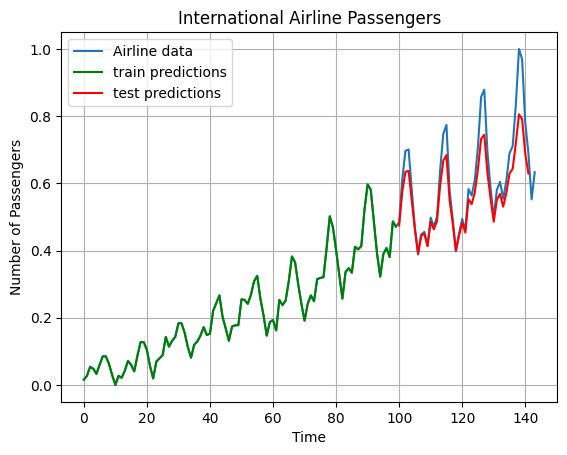

In [41]:
#plot predictions
train_plot = np.empty_like(dataset)
train_plot[:] = np.nan
train_plot[look_back:len(x_train)+look_back,:] = model.predict(x_train)

test_plot = np.empty_like(dataset)
test_plot[:] = np.nan
test_plot[len(x_train)+2*look_back:len(x_train)+2*look_back+len(x_test),:] = model.predict(x_test)

plt.plot(dataset)
plt.plot(train, 'g-')
plt.plot(test_plot, 'r-')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend(['Airline data','train predictions','test predictions'])
plt.grid()
plt.show()